# Churn for Bank Customers
* Hazırlayan: Ünal Berk Eken
## Problemimiz Ne?
* Problemimiz müşterinin bankayı terk edip etmeyeceğini tahmin etmek.
## Veri Setinin Hikayesi
* 14 değişkenimiz ve 10000 gözlemimiz var.
* Bağımlı değişkenimiz "Exited" değişkenidir, diğer değişkenler bağımsız değişkenlerdir.
* Binary Classification problemidir.
## Değişkenler
* RowNumber: Kayıt (satır) numarasına karşılık gelir ve çıktı üzerinde etkisi yoktur.
* CustomerId: Rastgele sayılar içerir, hedef değişkenimiz üzerinde etkisi yoktur. 
* Surname: Müşterinin soyadıdır, hedef değişkenimize etkisi yoktur.
* CreditScore: Müşterinin kredi puanını ifade eder.
* Geography: Müşterinin yaşadığı ülkeyi ifade eder. (Fransa, Almanya, İspanya)
* Gender: Müşterinin cinsiyeti. (Female, Male)
* Age: Müşterinin yaşını ifade eder.
* Tenure: Müşterinin bankanın müşterisi olduğu yıl sayısını ifade eder.
* Balance: Müşterinin hesap bakiyesi.
* NumOfProducts: Bir müşterinin banka aracılığıyla satın aldığı ürün sayısını ifade eder.
* HasCrCard: Müşterinin kredi kartı olup olmadığını gösterir. (0 veya 1)
* IsActiveMember: Müşterinin bankayı aktif kullandığını ifade eder. (0 veya 1)
* EstimatedSalary: Müşterinin tahmini maaşı.
* Exited: Müşterinin bankayı terk edip etmediği. (1 terk 0 kaldı)

## Kütüphanelerin Tanımlanması

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from warnings import filterwarnings
filterwarnings('ignore')

## Veri Setini Okuma ve Veriye Genel Bakış

In [5]:
ch = pd.read_csv("churn.csv")
df = ss.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [129]:
df.describe()

,CreditScore,Age,Balance,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,650.690740,37.735786,76434.055500,100094.184752,0.197638,0.501463,0.250627,0.247910,0.452759,0.547241,0.510242,0.463524,0.026233,0.294837,0.705163,0.496342,0.503658
std,96.093507,8.782984,62416.191144,57522.969343,0.398238,0.500024,0.433397,0.431822,0.497789,0.497789,0.499921,0.498694,0.159837,0.455993,0.455993,0.500013,0.500013
min,383.000000,18.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,0.000000,51014.837500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,97089.635000,100129.330000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,717.000000,43.000000,127611.332500,149461.830000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,850.000000,62.000000,250898.090000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Veri setinde 14 tane değişkenimiz ve 10000 adet gözlemimiz var, ayrıca;
* 3 adet String değişkenimiz var. (Surname,Geography,Gender)
* 11 adet Sayısal değişkenimiz var. (RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited)

In [13]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

* Veri setinde kayıp değer yok.

In [15]:
df.drop(["RowNumber","CustomerId","Surname"], axis = 1 , inplace = True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

* Veri setimizde ki  problemimize etki etmeyecek değişkenler veri setinden çıkarıldı.

## Kategorik Değişkenlerin Analizi
* Kategorik değişkenlerimizi "cat_list" listesinde topluyorum.
* Ardından tek tek grafik oluşturup analiz etmektense bir fonksiyon oluşturuyorum.
* Sonra for döngüsü ile listemin içinde dolaşıp fonksiyonumu çağırıyorum.

In [9]:
cat_list = ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember","Exited"]

In [11]:
def category(degisken):
    print(df[degisken].value_counts())
    
    sns.countplot(df[degisken])
    plt.show()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


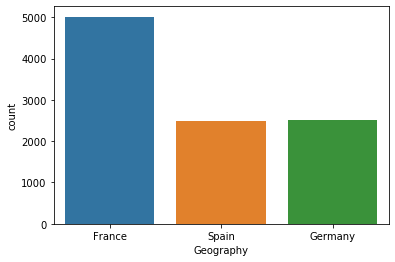

Male      5457
Female    4543
Name: Gender, dtype: int64


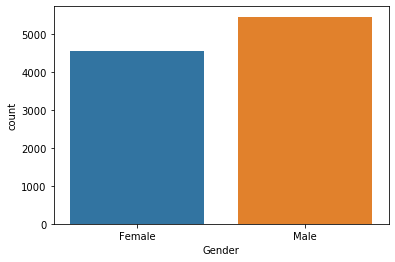

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


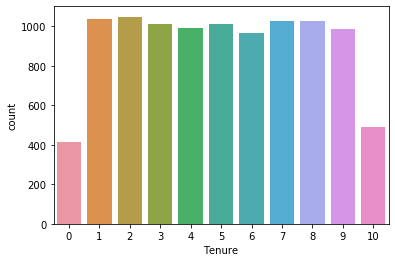

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


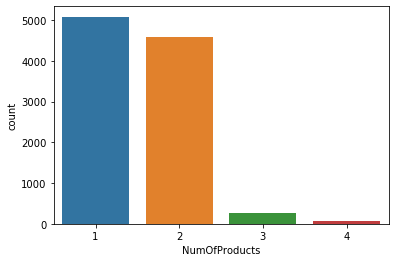

1    7055
0    2945
Name: HasCrCard, dtype: int64


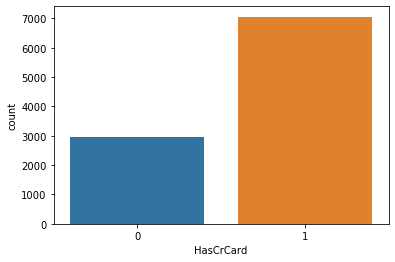

1    5151
0    4849
Name: IsActiveMember, dtype: int64


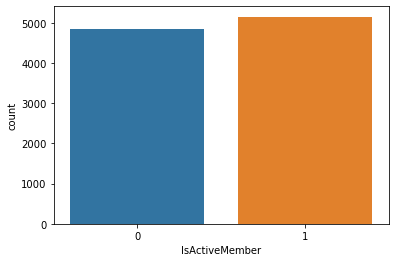

0    7963
1    2037
Name: Exited, dtype: int64


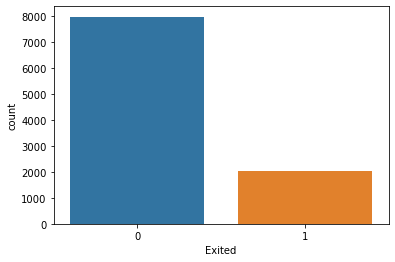

In [12]:
for i in cat_list:
    category(i)

* Müşteriler ağırlıklı olarak Fransa'da yaşıyorlar, Almaya ve İspanya'da yaşayan müşteri sayısı çok yakın.  
* Müşterilerin cinsiyeti ağırlıklı olarak erkek ama sayıları birbirine yakın yani dengeli bir değişken diyebiliriz.
* Müşteriler genel olarak 1 ile 9 yıldır bankanın müşterisi olduğunu anladık.
* Müşteriler genelde 1 ve 2 ürün almışlar, 2'den fazla ürün alan müşteri sayısında ciddi bir düşüş var. Dengesiz bir dağılım.
* Müşteriler genelde kredi kartı sahibi. Dengesiz bir dağılım söz konusu.
* Müşteriler bankayı daha fazla aktif olarak kullanıyor fakat dengeli bir dağılım söz konusu.
* Müşteriler genel olarak bankayı terk etmemişler. Dengesiz bir dağılım var.

## Sayısal Değişkenlerin Analizi
* Sürekli değişkenlerimizi "num_list" listesinde topluyorum.
* Ardından tek tek grafik oluşturup analiz etmektense bir fonksiyon oluşturuyorum.
* Sonra for döngüsü ile listemin içinde dolaşıp fonksiyonumu çağırıyorum.

In [18]:
num_list = ["CreditScore","Age","Balance","EstimatedSalary"]

In [59]:
def sayisal(degisken):
    plt.hist(df[degisken], bins = 20, color = "green")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("{} değişken dağılımı".format(degisken))
    plt.show()

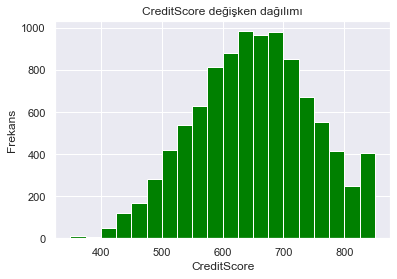

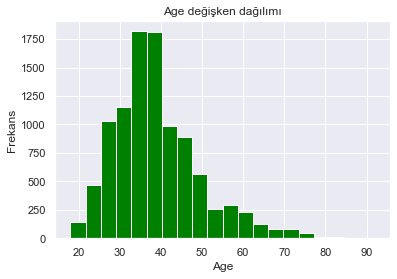

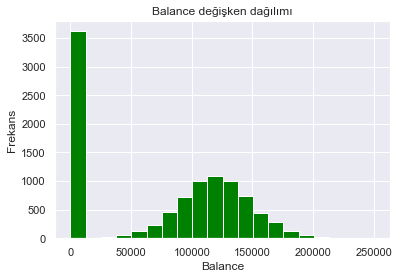

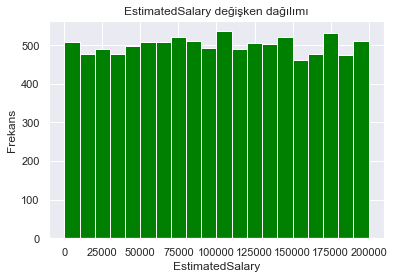

In [60]:
for i in num_list:
    sayisal(i)

* CreditScore değişkeni sola çarpık.
* Age değişkeni sağa çarpık.
* Balance değişkeni 0 oranı fazla oldğunudan sola toplanmış.
* EstimatedSalary değişkeni normal bir dağılım sergilemiş.

## Kategorik Değişkenlerin Bağımlı Değişkene Etkisi
* Bağımlı değişken ile inceleyeceğimiz kategorik değişkenlerimizi "cat_effect" adlı listede topladık.
* Ardından kategorik_etki adlı bir fonkisyon oluşturduk ve for döngüsü ile listemizde dolaşıp fonksiyonumuzu çağırıyoruz.

In [61]:
cat_effect = ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember"]

In [66]:
def kategorik_etki(degisken):
    
    print("{} değişkenin müşteri kaybına etkisi : \n".format(degisken))
    print(df.groupby(degisken)["Exited"].mean())
    
    sns.countplot(y = degisken, hue = "Exited" , data = df)
    plt.show()

Geography değişkenin müşteri kaybına etkisi : 

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


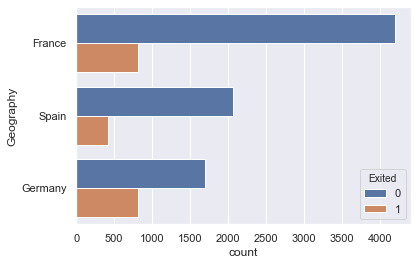

Gender değişkenin müşteri kaybına etkisi : 

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64


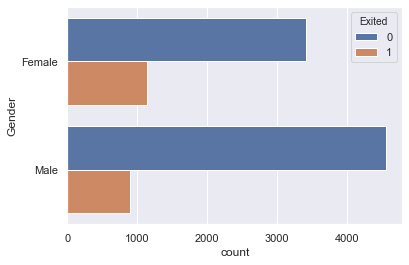

Tenure değişkenin müşteri kaybına etkisi : 

Tenure
0     0.230024
1     0.224155
2     0.191794
3     0.211100
4     0.205258
5     0.206522
6     0.202689
7     0.172179
8     0.192195
9     0.216463
10    0.206122
Name: Exited, dtype: float64


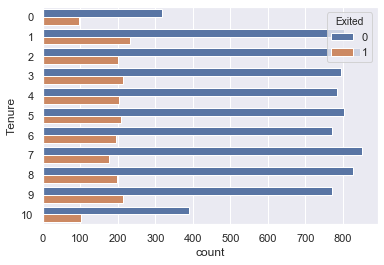

NumOfProducts değişkenin müşteri kaybına etkisi : 

NumOfProducts
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: Exited, dtype: float64


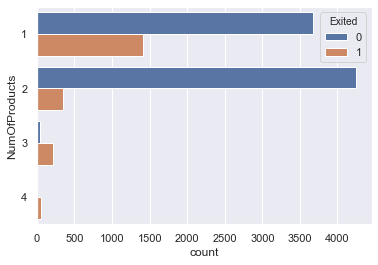

HasCrCard değişkenin müşteri kaybına etkisi : 

HasCrCard
0    0.208149
1    0.201843
Name: Exited, dtype: float64


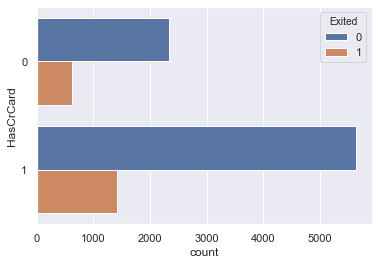

IsActiveMember değişkenin müşteri kaybına etkisi : 

IsActiveMember
0    0.268509
1    0.142691
Name: Exited, dtype: float64


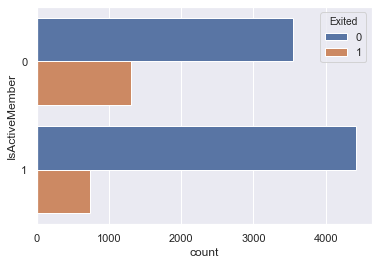

In [67]:
for i in cat_effect:
    kategorik_etki(i)

* Müşteri kaybı ortalaması en fazla Almanya'da.
* Kadın müşteriler bankadan daha çok ayrılmış.
* Tenure değişkeninden kesin bir sonuç çıkaramıyoruz. Dağılımlar yakın.
* 2'den fazla ürün alan müşterilerde yüksek oranda kayıp olduğu gözlemleniyor ama şunu unutmayalım verilerimiz dengesiz.   4 ürün almış müşterilerin hepsi(60 kişi) bankadan ayrılmış.
* Kredi kartı kullanan veya kullanmayan müşteri kaybı oranı yakın ama HasCrCard değişkeninimizdeki verilerde dengesizdi.
* Aktif olarak bankayı kullanmayan müşteriler bankadan daha fazla ayrılmış. 

## Outliers
* Aykırı gözlemleri görebilmek için boxplot graifiğini kullandık.

In [69]:
list_ol = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]

In [70]:
def outlier_show(variable):
    
    sns.boxplot(df[variable])
    plt.show()

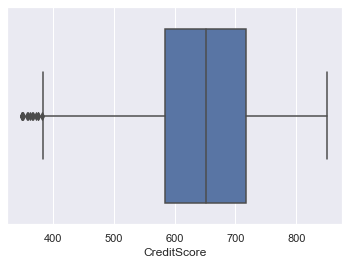

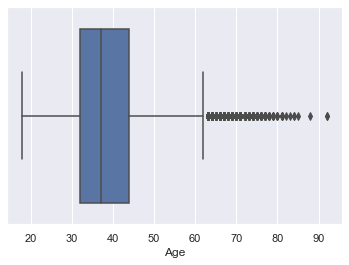

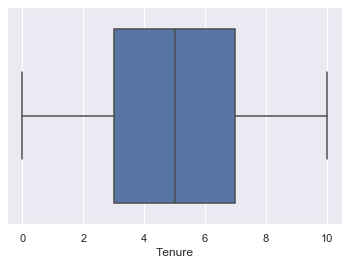

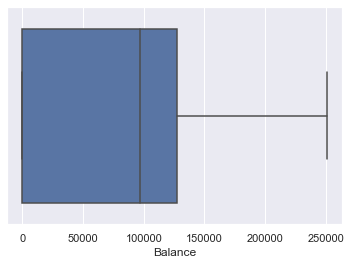

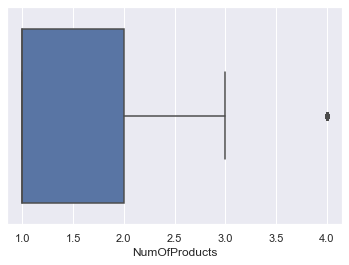

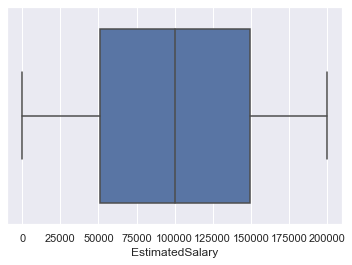

In [72]:
for i in list_ol:
    outlier_show(i)

* CreditScore, Age, NumOfProducts değişkenleri aykırı gözlemlere sahip.
* Aykırı değerleri tespit etmek ve bu değerlerin indekslerini liste halinde tutmak için bir fonksiyon oluşturuyoruz.

In [73]:
  def outlier(df_ol, degiskenler):
    
    aykiri_indexler = []
    
    for i in degiskenler:
        
        Q1 = df_ol[i].quantile(0.25)
        Q3 = df_ol[i].quantile(0.75)


        IQR = Q3 - Q1

        alt_sinir = Q1 - 1.5*IQR
        ust_sinir = Q3 + 1.5*IQR

        toplam_filtre = ((df_ol[i] < alt_sinir) | (df_ol[i] > ust_sinir))

        aykiri_gozlemler = df_ol[i][toplam_filtre]
        aykiri_index = aykiri_gozlemler.index
        
        aykiri_indexler.extend(aykiri_index)
        
    aykiri_indexler = Counter(aykiri_indexler)
    
    ortak_indexler = [i for i, v in aykiri_indexler.items() if v > 0]
    
    return ortak_indexler

In [74]:
ortak_indexler = outlier(df, ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"])

In [75]:
df.loc[ortak_indexler]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
...,...,...,...,...,...,...,...,...,...,...,...
9323,644,France,Male,50,9,76817.00,4,1,0,196371.13,1
9370,561,France,Male,43,4,0.00,4,0,0,18522.91,1
9411,689,Germany,Female,40,4,78119.59,4,1,0,119259.34,1
9540,727,Germany,Male,46,3,115248.11,4,1,0,130752.01,1


* 432 tane gözlemde 1 veya daha fazla aykırı değer var.

In [76]:
df.shape

(10000, 11)

In [77]:
df = df.drop(ortak_indexler, axis = 0).reset_index(drop = True)

* Aykırı değer içeren gözlemleri veri setinden sildik.

In [78]:
df.shape

(9568, 11)

## Korelasyon Matrisi

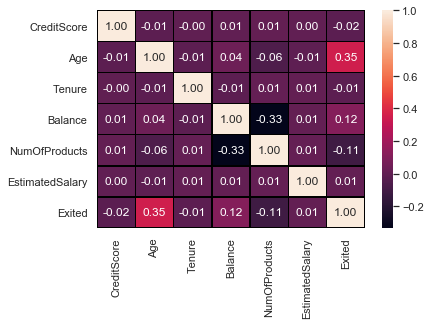

In [96]:
list_corr = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary","Exited"]
sns.heatmap(df[list_corr].corr(), annot = True, linecolor = "black", lw = 0.5, fmt= '.2f') 

* Exited ile en kuvvetli ilişkiye Age değişkeni sahip (0.35). Buradan şu yorumu yapabiliriz müşterinin yaşı arttıkça müşteriyi kaybetmemizin oranıda artıyor. (Pozitif kuvvetli ilişki) 
* Exited ile Balance değişkeni kısmen kuvvetli ilişkiye sahip (0.12). 
* Exited ile NumOfProducts değişkeni kısmen kuvvetli ilişkiye sahip (-0.11). Negatif kuvvetli ilişkiye sahipler.

### Age-Exited Değişkenlerini İnceleyelim

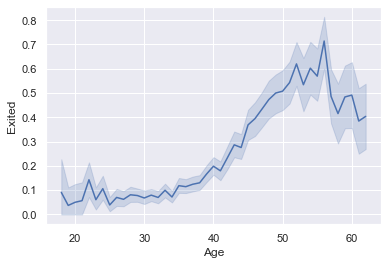

In [97]:
sns.lineplot(x = "Age", y = "Exited", data = df);

In [99]:
df.groupby(df["Exited"])["Age"].mean()

Exited
0    36.193826
1    43.995769
Name: Age, dtype: float64

* Evet korelasyon matrisini analiz ederken söylediğimiz gibi müşterinin yaşı arttıkça müşteriyi kaybetme oranoda artıyor.
* Bankadan ayrılmayan müşterilerin yaş ortalaması ==> 36
* Bankadan ayrılan müşterilerin yaş ortalaması ==> 43

### Balance-Exited Değişkenlerini İnceleyelim

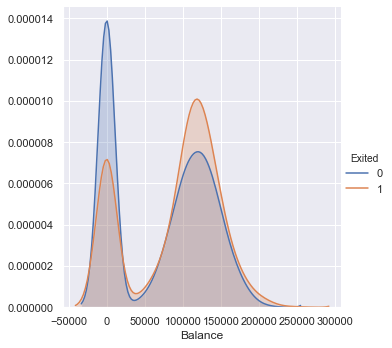

In [109]:
(sns.FacetGrid(df, hue = "Exited", height = 5).map(sns.kdeplot, "Balance", shade= True).add_legend());

In [110]:
df.groupby(df["Exited"])["Balance"].mean()

Exited
0    72870.208446
1    90902.407604
Name: Balance, dtype: float64

* Müşterilerin hesap bakiyesinde ki değer çok fazla 0 olduğundan dolayı doğru bir analiz yapamayabiliyoruz ama şu yorumları söyleyebiliriz, müşterinin hesap bakiyesi 0 olduğunda genellikle müşteriler bankadan ayrılmamış ve 50000 ile 200000 birim arasındaki hesap bakiyelerine sahip müşteriler genellikle bankadan ayrılmış.
* Bankadan ayrılamayan müşterilerin hesap bakiyesi ortalaması ==>72.870
* Bankadan ayrılan müşterilerin hesap bakiyesi ortalaması ==>90.902
* Ama burada 0 hesap bakiyesine sahip müşterilerin fazla olması değişkenimizi dengesizleştiriyor.

### NumOfProducts-Balance-Exited Değişkenlerinin İnceleyelim

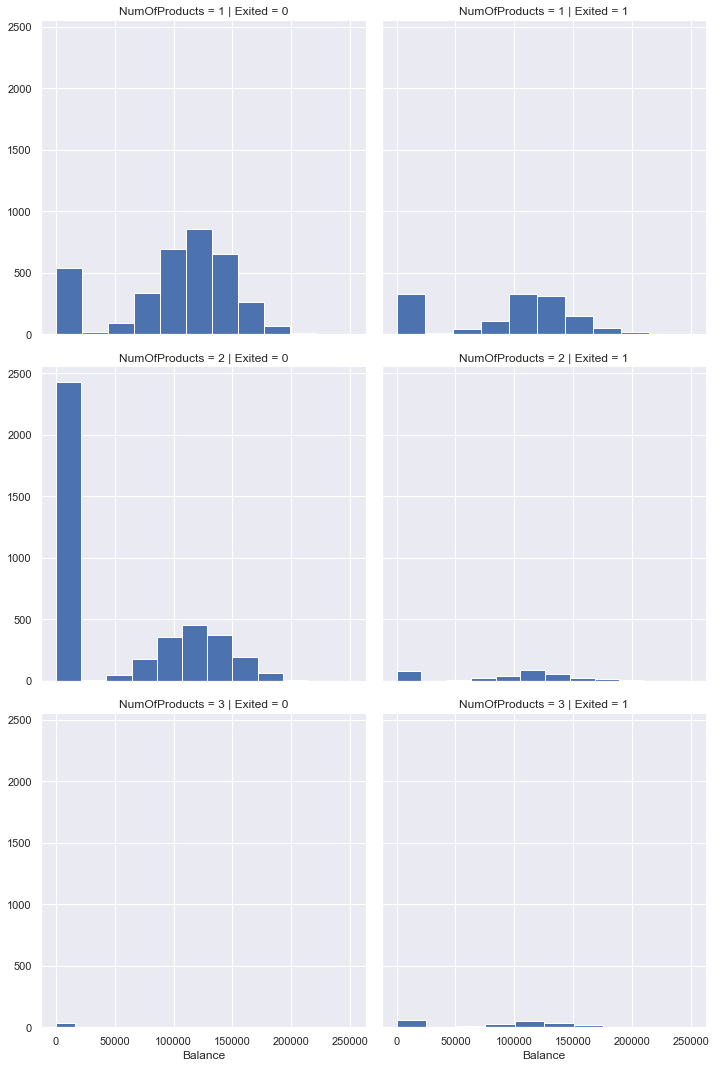

In [118]:
(sns.FacetGrid(df, col = "Exited", row = "NumOfProducts", height = 5).map(plt.hist, "Balance",bins =10).add_legend());

In [119]:
df.groupby(["NumOfProducts","Exited"])["Balance"].mean()

NumOfProducts  Exited
1              0         101228.606687
               1          91931.529217
2              0          48953.872650
               1          90796.121611
3              0          28196.098571
               1          84407.510718
Name: Balance, dtype: float64

* NumOfProducts değişkenindeki 4 değerini aykırı değerleri silme işleminde silmiştik.

## Feature Engineering
* Geography, Gender, NumOfProducts, HasCrCard ve IsActiveMember değişkenlerini modelimiz için aldığı değerlere göre değişkenlere ayırcaz. Kısaca dummies işlemi uygulayacağız.

In [123]:
df["NumOfProducts"] = df["NumOfProducts"].astype("category")
df["HasCrCard"] = df["HasCrCard"].astype("category")
df["IsActiveMember"] = df["IsActiveMember"].astype("category")

df = pd.get_dummies(df, columns = ["Geography"])
df = pd.get_dummies(df, columns = ["Gender"])
df = pd.get_dummies(df, columns = ["NumOfProducts"])
df = pd.get_dummies(df, columns = ["HasCrCard"])
df = pd.get_dummies(df, columns = ["IsActiveMember"])

In [124]:
df.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,101348.88,1,1,0,0,1,0,1,0,0,0,1,0,1
1,608,41,1,83807.86,112542.58,0,0,0,1,1,0,1,0,0,1,0,0,1
2,502,42,8,159660.80,113931.57,1,1,0,0,1,0,0,0,1,0,1,1,0
3,699,39,1,0.00,93826.63,0,1,0,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,79084.10,0,0,0,1,1,0,1,0,0,0,1,0,1


* Değişkenleri arasındaki ilişkileri incelerken Tenure değişkeni bizim hedef değişkenimize etkisinin olmadığını fark ettik. Modelimizi yanıltmaması için Tenure değişkenini siliceğiz.

In [126]:
df.drop(["Tenure"], axis = 1 , inplace = True)

KeyError: "['Tenure'] not found in axis"

## Özellik Ölçeklendirme 
* Veri setimizdeki değişkenler dengesiz olduğundan normalleştirme yöntemini uyguladık.

In [145]:
x_df = df.drop(["Exited"], axis=1)
y = df["Exited"]

x = (x_df - np.min(x_df)) / (np.max(x_df)-np.min(x_df)).values
x.head()

,CreditScore,Age,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.505353,0.545455,0.000000,0.506735,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.481799,0.522727,0.334031,0.562709,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.254818,0.545455,0.636357,0.569654,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.676660,0.477273,0.000000,0.469120,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.000000,0.568182,0.500246,0.395400,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


## Train-Test Split

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

## Modeller
* Logistic Regression
* KNN
* Random Forest

## Logistic Regression
* y = ax1+ bx2 +cx3 + e  ===> y bizim bağımlı değişkenimizin çıktısı, x bizim bağımsız değişkenlerimizin girdisi(a,b ve c bağımsız değişkenlerimizin girdisinin katsayıları), e ise sabitimiz.

In [152]:
loj = LogisticRegression(solver = "liblinear")
loj.fit(x_train,y_train)
loj

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
loj.intercept_

array([-0.83279865])

* Sabit değer (Denklemdeki "e" değeri).

In [154]:
loj.coef_

array([[-2.52171142e-01,  4.54915181e+00, -2.79827974e-01,
        -8.16600119e-03, -6.15455011e-01,  3.64005347e-01,
        -5.81348990e-01, -1.52526232e-01, -6.80272423e-01,
        -5.95319036e-01, -2.21381415e+00,  1.97633453e+00,
        -3.78490618e-01, -4.54308037e-01,  3.97442191e-03,
        -8.36773077e-01]])

* Bağımsız değişkenlerin girdilerinin katsayıları (Denklemdeki a,b,c değerleri tabi bizim 3 değil 16 tane bağımsız değişkenimiz var)

In [156]:
print("Test accurarcy {}".format(loj.score(x_test,y_test)))

Test accurarcy 0.8474399164054337


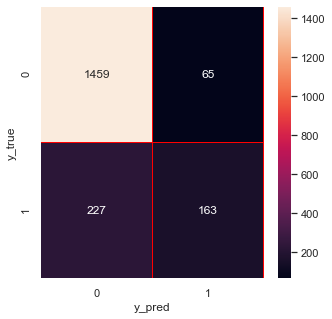

In [160]:
y_pred = loj.predict(x_test)
y_true = y_test

cm =confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Model Tuning
* Overfitting durumunun önüne geçmek için cross validation işlemi uyguluyorum.

In [157]:
cross_val_score(loj, x_test, y_test, cv = 10).mean()

0.850054537521815

## KNN

In [162]:
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train,y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [163]:
y_pred = knn_model.predict(x_test)

In [164]:
accuracy_score(y_test,y_pred)

0.8218390804597702

### Model tuning
* Optimum hiper parametre değerlerini bulucağız.

In [165]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [167]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [168]:
print("The best parameters: " + str(knn_cv.best_params_))

The best parameters: {'n_neighbors': 7}


In [169]:
knn = KNeighborsClassifier(7)
knn_model = knn.fit(x_train, y_train)

In [170]:
y_pred = knn_model.predict(x_test)

In [171]:
accuracy_score(y_test, y_pred)

0.8249738766980146

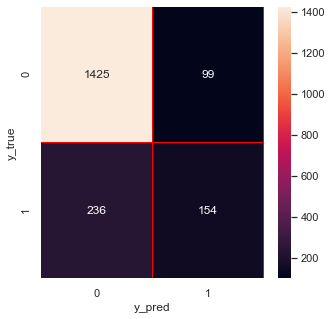

In [172]:
y_true = y_test

cm =confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Random Forest

In [174]:
rf_model = RandomForestClassifier().fit(x_train, y_train)

In [175]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8427377220480669

### Model Tuning

In [176]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [177]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [178]:
rf_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 22.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [180]:
print("The best parameters: " + str(rf_cv_model.best_params_))

The best parameters: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 1000}


In [182]:
rf_tuned = RandomForestClassifier(max_depth = 8, 
                                  max_features = 5, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [183]:
y_pred = rf_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.857889237199582

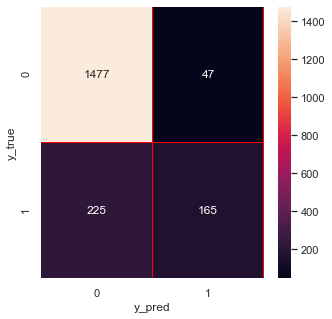

In [184]:
y_true = y_test

cm =confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Modellerin Karşılaştırılması

In [188]:
models = [
    knn_model,
    loj,
    rf_tuned,
     
        ]


for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 82.4974%
----------------------------
LogisticRegression:
Accuracy: 84.7440%
----------------------------
RandomForestClassifier:
Accuracy: 85.7889%


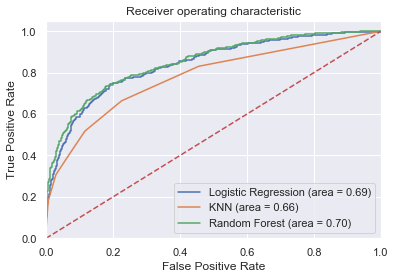

In [186]:
logistic_roc_auc = roc_auc_score(y_test, loj.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, loj.predict_proba(x_test)[:,1])
knn_roc_auc = roc_auc_score(y_test, knn_model.predict(x_test))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_model.predict_proba(x_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf_tuned.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_tuned.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Modellerin başarısı incelendiğinde KNN algoritaması Logistic Regression ve Random Forest algoritmalarına göre düşük başarı elde etti.
* En  iyi başarı skorunu Random Forest algoritmasından elde ettik.